In [1]:
import pandas as pd

In [2]:
import numpy as np

In [3]:
import matplotlib.pyplot as plt

In [10]:
df = pd.read_csv('../data/bank.csv')

In [11]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


In [12]:
df.shape

(11162, 17)

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        11162 non-null  int64 
 1   job        11162 non-null  object
 2   marital    11162 non-null  object
 3   education  11162 non-null  object
 4   default    11162 non-null  object
 5   balance    11162 non-null  int64 
 6   housing    11162 non-null  object
 7   loan       11162 non-null  object
 8   contact    11162 non-null  object
 9   day        11162 non-null  int64 
 10  month      11162 non-null  object
 11  duration   11162 non-null  int64 
 12  campaign   11162 non-null  int64 
 13  pdays      11162 non-null  int64 
 14  previous   11162 non-null  int64 
 15  poutcome   11162 non-null  object
 16  deposit    11162 non-null  object
dtypes: int64(7), object(10)
memory usage: 1.4+ MB


In [14]:
df.describe(include = 'all')

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
count,11162.000000,11162,11162,11162,11162,11162.000000,11162,11162,11162,11162.000000,11162,11162.000000,11162.000000,11162.000000,11162.000000,11162,11162
unique,NaN,12,3,4,2,NaN,2,2,3,NaN,12,NaN,NaN,NaN,NaN,4,2
top,NaN,management,married,secondary,no,NaN,no,no,cellular,NaN,may,NaN,NaN,NaN,NaN,unknown,no
freq,NaN,2566,6351,5476,10994,NaN,5881,9702,8042,NaN,2824,NaN,NaN,NaN,NaN,8326,5873
mean,41.231948,NaN,NaN,NaN,NaN,1528.538524,NaN,NaN,NaN,15.658036,NaN,371.993818,2.508421,51.330407,0.832557,NaN,NaN
std,11.913369,NaN,NaN,NaN,NaN,3225.413326,NaN,NaN,NaN,8.420740,NaN,347.128386,2.722077,108.758282,2.292007,NaN,NaN
min,18.000000,NaN,NaN,NaN,NaN,-6847.000000,NaN,NaN,NaN,1.000000,NaN,2.000000,1.000000,-1.000000,0.000000,NaN,NaN
25%,32.000000,NaN,NaN,NaN,NaN,122.000000,NaN,NaN,NaN,8.000000,NaN,138.000000,1.000000,-1.000000,0.000000,NaN,NaN
50%,39.000000,NaN,NaN,NaN,NaN,550.000000,NaN,NaN,NaN,15.000000,NaN,255.000000,2.000000,-1.000000,0.000000,NaN,NaN
75%,49.000000,NaN,NaN,NaN,NaN,1708.000000,NaN,NaN,NaN,22.000000,NaN,496.000000,3.000000,20.750000,1.000000,NaN,NaN


In [15]:
dup_count = df.duplicated().sum()

In [16]:
dup_ratio = dup_count / len(df)

In [17]:
dup_count, dup_ratio

(np.int64(0), np.float64(0.0))

In [18]:
missing = df.isnull().mean().sort_values(ascending = False)

In [19]:
missing

age          0.0
job          0.0
marital      0.0
education    0.0
default      0.0
balance      0.0
housing      0.0
loan         0.0
contact      0.0
day          0.0
month        0.0
duration     0.0
campaign     0.0
pdays        0.0
previous     0.0
poutcome     0.0
deposit      0.0
dtype: float64

In [20]:
df['deposit'].value_counts(normalize = True)

deposit
no     0.52616
yes    0.47384
Name: proportion, dtype: float64

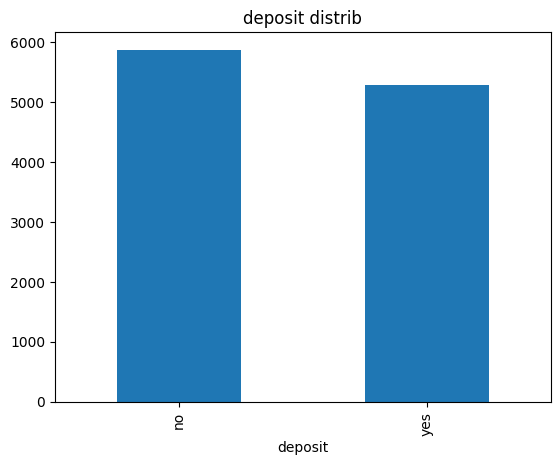

In [21]:
df['deposit'].value_counts().plot(kind = 'bar')
plt.title('deposit distrib')
plt.show()

In [22]:
bins = [0,30,40,50,60,100]

In [23]:
labels = ['<30', '30-39', '40-49', '50-59', '60+']

In [25]:
df['age_band'] = pd.cut(df['age'], bins = bins, labels = labels)

In [26]:
age_conv = df.groupby('age_band')['deposit'].apply(
    lambda x: (x == 'yes').mean()
)

C:\Users\user\AppData\Local\Temp\ipykernel_31404\2434690388.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_conv = df.groupby('age_band')['deposit'].apply(


In [27]:
age_conv

age_band
<30      0.570503
30-39    0.432665
40-49    0.408253
50-59    0.436022
60+      0.821604
Name: deposit, dtype: float64

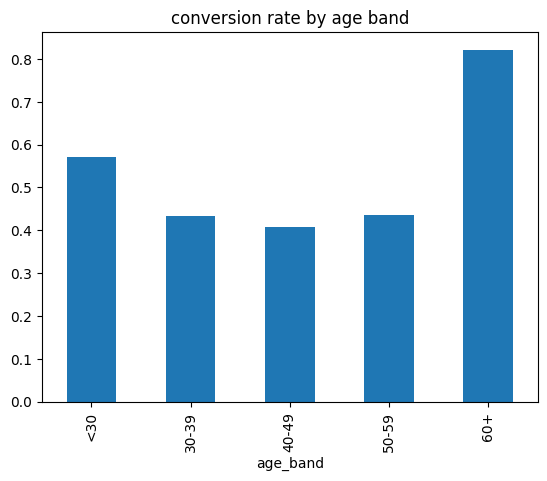

In [28]:
age_conv.plot(kind = 'bar')
plt.title('conversion rate by age band')
plt.show()

In [30]:
job_conv = df.groupby('job')['deposit'].apply(
    lambda x: (x == 'yes').mean()
).sort_values(ascending = False)

In [31]:
job_conv.head(10)

job
student          0.747222
retired          0.663239
unemployed       0.565826
management       0.507015
unknown          0.485714
admin.           0.473013
self-employed    0.461728
technician       0.460779
services         0.399783
housemaid        0.397810
Name: deposit, dtype: float64

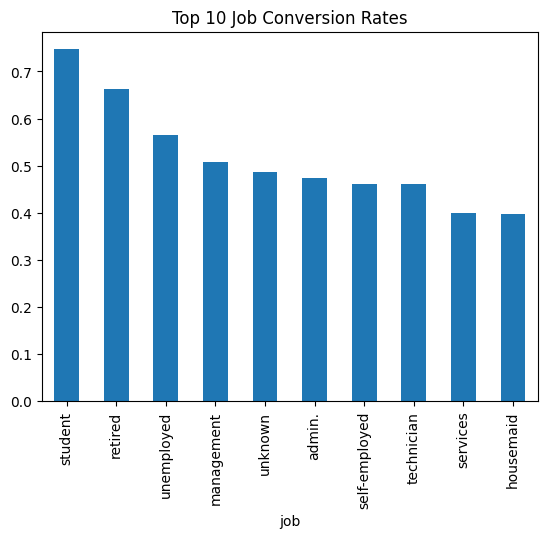

In [32]:
job_conv.head(10).plot(kind = 'bar')
plt.title('Top 10 Job Conversion Rates')
plt.show()

In [33]:
df['balance_q'] = pd.qcut(df['balance'], 5, labels = False)

In [35]:
bal_conv = df.groupby('balance_q')['deposit'].apply(
    lambda x: (x=='yes').mean()
)

In [36]:
bal_conv

balance_q
0    0.347321
1    0.438510
2    0.478690
3    0.525067
4    0.580009
Name: deposit, dtype: float64

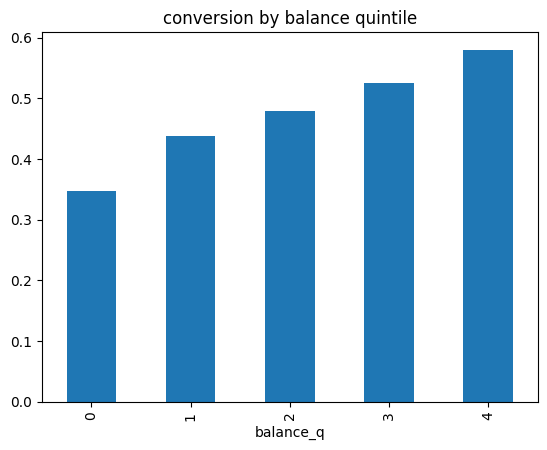

In [37]:
bal_conv.plot(kind = 'bar')
plt.title('conversion by balance quintile')
plt.show()

In [38]:
df['duration_band'] = pd.cut(
    df['duration'],
    bins = [0,60,180,360,9999],
    labels = ['<1m', '1-3m', '3-6m', '6m+']
)

In [39]:
dur_conv = df.groupby('duration_band')['deposit'].apply(
    lambda x: (x == 'yes').mean()
)

C:\Users\user\AppData\Local\Temp\ipykernel_31404\46716791.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  dur_conv = df.groupby('duration_band')['deposit'].apply(


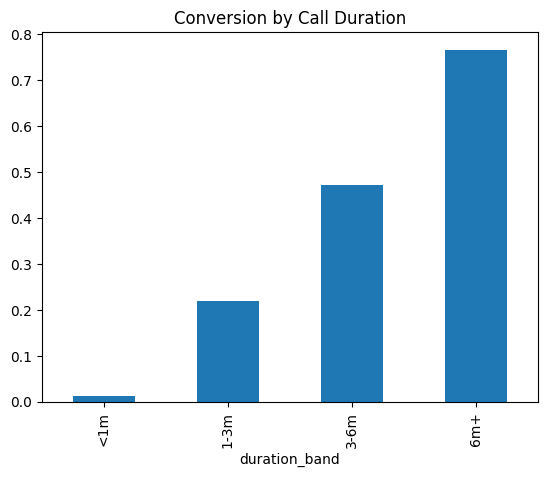

In [40]:
dur_conv.plot(kind = 'bar')
plt.title('Conversion by Call Duration')
plt.show()

In [41]:
df['campaign_band'] = pd.cut(
    df['campaign'],
    bins = [0,1,3,6,9999],
    labels = ['1','2-3','4-6','7+']
)

In [42]:
camp_conv = df.groupby('campaign_band')['deposit'].apply(
    lambda x: (x == 'yes').mean()
)

C:\Users\user\AppData\Local\Temp\ipykernel_31404\3792069761.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  camp_conv = df.groupby('campaign_band')['deposit'].apply(


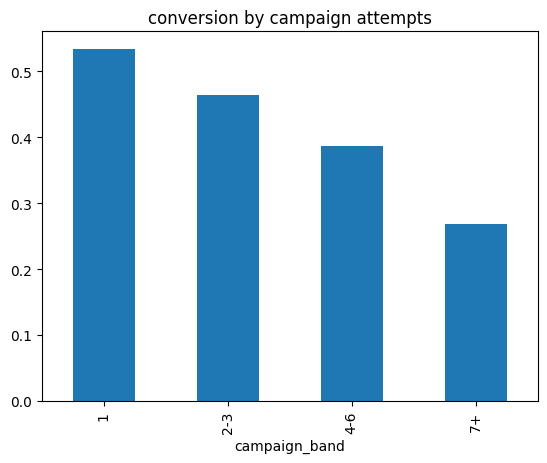

In [43]:
camp_conv.plot(kind = 'bar')
plt.title('conversion by campaign attempts')
plt.show()

In [44]:
contact_conv = df.groupby('contact')['deposit'].apply(
    lambda x: (x=='yes').mean()
)

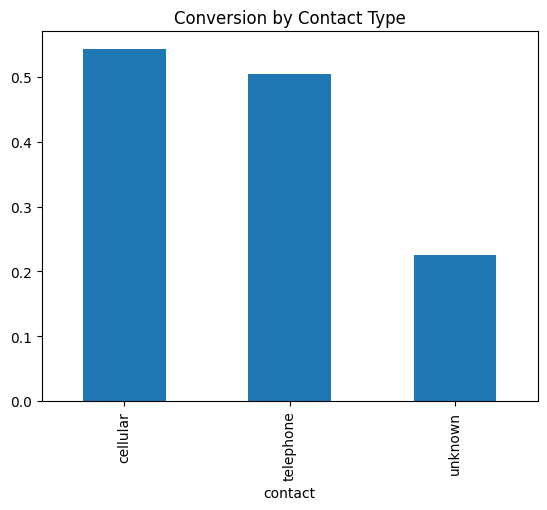

In [45]:
contact_conv.plot(kind = 'bar')
plt.title('Conversion by Contact Type')
plt.show()

In [46]:
pd.crosstab(df['housing'], df['deposit'], normalize = 'index')

deposit,no,yes
housing,,
no,0.429689,0.570311
yes,0.633592,0.366408


Business Insight — Bank Marketing Campaign

Dataset shows low overall conversion rate, indicating a highly imbalanced response pattern typical for cold-call campaigns.

Conversion increases significantly with longer call durations, suggesting engagement depth is a strong response indicator (note: may cause leakage in predictive modeling).

Higher balance quintiles show stronger conversion, indicating financial capacity correlates with product acceptance.

Some job and age segments outperform others, enabling targeted campaign optimization.

Customers contacted multiple times show decreasing conversion, suggesting diminishing returns after repeated attempts.

Contact channel effectiveness differs, implying channel strategy matters.

Recommendation: Focus campaigns on high-balance segments, responsive job groups, and optimize first-contact quality rather than repeated attempts.